<a href="https://colab.research.google.com/github/codewithkaran3/quant/blob/main/quant2_movingavg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 8.9 MB/s 
     |████████████████████████████████| 112 kB 32.7 MB/s 
     |████████████████████████████████| 128 kB 73.7 MB/s 
     |████████████████████████████████| 110 kB 16.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = yf.download ( 'SBIN.NS' , start = "2005-01-01"  )

[*********************100%***********************]  1 of 1 completed


In [21]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-19,604.000000,609.500000,603.000000,604.450012,604.450012,8322012
2022-12-20,603.000000,606.500000,599.549988,604.450012,604.450012,6753785
2022-12-21,605.900024,609.150024,589.599976,593.400024,593.400024,9217253
2022-12-22,597.000000,599.000000,587.549988,593.400024,593.400024,8740149
2022-12-23,590.000000,590.700012,571.500000,574.000000,574.000000,13047046


In [25]:
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA20'] = df['Adj Close'].rolling(20).mean()

In [31]:
df = df.dropna()
df = df[ ['Adj Close', 'MA50', 'MA20']]
df

,Adj Close,MA50,MA20
Date,,,
2005-03-15,55.589214,49.518045,53.324624
2005-03-16,55.304333,49.627818,53.570948
2005-03-17,55.167595,49.743744,53.823540
2005-03-18,55.289146,49.911405,54.087717
2005-03-21,54.901707,50.091296,54.323026
...,...,...,...
2022-12-19,604.450012,587.568000,609.962497
2022-12-20,604.450012,589.053000,610.229999
2022-12-21,593.400024,590.306001,609.517499


In [34]:
Buy = []
Sell = []

for i in range(len(df)):
  if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
    Buy.append(i)
  elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
    Sell.append(i)
    

In [36]:
len(Buy)
Buy


[54,
 184,
 251,
 348,
 526,
 625,
 788,
 842,
 941,
 1006,
 1088,
 1239,
 1476,
 1493,
 1568,
 1697,
 1793,
 1865,
 1917,
 2008,
 2113,
 2227,
 2348,
 2376,
 2516,
 2555,
 2621,
 2647,
 2719,
 2771,
 2874,
 2932,
 3052,
 3116,
 3256,
 3305,
 3375,
 3461,
 3609,
 3763,
 3859,
 3991,
 4074,
 4158,
 4215,
 4276,
 4348]

In [37]:
len(Buy)

47

In [35]:
Sell

[19,
 163,
 223,
 284,
 455,
 616,
 722,
 795,
 892,
 961,
 1074,
 1177,
 1407,
 1489,
 1527,
 1591,
 1747,
 1828,
 1900,
 1958,
 2037,
 2177,
 2313,
 2369,
 2447,
 2526,
 2584,
 2639,
 2648,
 2755,
 2873,
 2899,
 3021,
 3074,
 3157,
 3292,
 3340,
 3431,
 3547,
 3660,
 3833,
 3962,
 4061,
 4128,
 4190,
 4235,
 4344]

In [38]:
len(Sell)

47

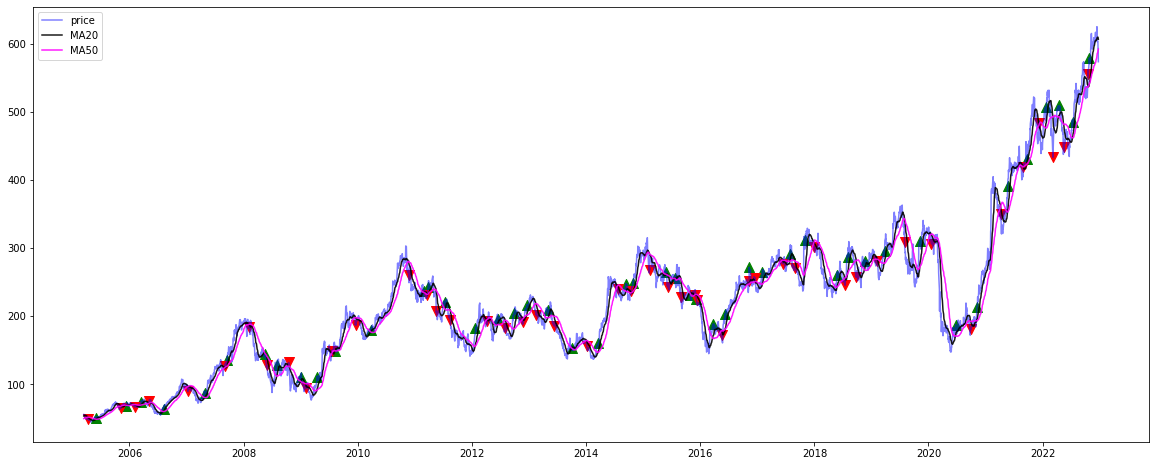

In [42]:
plt.figure(figsize=(20,8))
plt.plot(df['Adj Close'], label = 'price', c='blue', alpha = 0.5)
plt.plot(df['MA20'], label ='MA20', c='black', alpha = 0.9)
plt.plot(df['MA50'], label ='MA50', c='magenta', alpha = 0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker ='^', color = 'g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker ='v', color = 'r', s=100)
plt.legend()
plt.show()